In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import pandas as pd
import pickle
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
#from neupy.algorithms import RBFKMeans
from neupy.algorithms import GRNN
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import linear_model
import seaborn as sn
import joblib
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)



In [ ]:
def print_results_max(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))
    MAxMean=0
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        if mean > MAxMean :
            MAxMean = mean
            print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))
    return MAxMean

In [ ]:
X_test_standard= np.load('X_test_standard.npy')
Y_train_standard= np.load('Y_train_standard.npy').ravel()
X_train_standard= np.load('X_train_standard.npy')
Y_test_standard= np.load('Y_test_standard.npy')

In [ ]:
len(Y_train_standard)

In [ ]:
SVM =SVR()
parameters = {
        'kernel' : ['linear', 'poly', 'rbf','sigmoid'],
        'degree' : [3,4,5,6],
        'epsilon': [0,0.02,0.1,0.15,1,10,20]
}

cv = GridSearchCV(SVM, parameters, cv=5)
cv.fit(X_train_standard, Y_train_standard)

print_results_max(cv)
MAxMean=print_results_max(cv)
MAxMean

In [ ]:
cv.best_estimator_

In [ ]:
joblib.dump(cv.best_estimator_, 'SVM_model.pkl')

In [ ]:
#0.804 (+/-0.212) for {'degree': 3, 'epsilon': 0.02, 'kernel': 'rbf'}

BEST PARAMS: {'C': 0.01, 'degree': 3, 'epsilon': 0.1, 'kernel': 'poly'}

0.35 (+/-0.182) for {'C': 0.01, 'degree': 3, 'epsilon': 0.1, 'kernel': 'poly'}
BEST PARAMS: {'C': 0.01, 'degree': 3, 'epsilon': 0.1, 'kernel': 'poly'}

0.293 (+/-0.119) for {'C': 0.01, 'degree': 3, 'epsilon': 0.1, 'kernel': 'poly'}
BEST PARAMS: {'C': 0.01, 'degree': 3, 'epsilon': 0, 'kernel': 'poly'}

0.272 (+/-0.135) for {'C': 0.01, 'degree': 3, 'epsilon': 0.1, 'kernel': 'poly'}
0.289 (+/-0.289) for {'C': 0.01, 'degree': 3, 'epsilon': 0, 'kernel': 'poly'}
BEST PARAMS: {'C': 0.01, 'degree': 3, 'epsilon': 0.1, 'kernel': 'poly'}

0.347 (+/-0.194) for {'C': 0.01, 'degree': 3, 'epsilon': 0.1, 'kernel': 'poly'}
BEST PARAMS: {'C': 0.01, 'degree': 3, 'epsilon': 0.1, 'kernel': 'poly'}

0.302 (+/-0.155) for {'C': 0.01, 'degree': 3, 'epsilon': 0.1, 'kernel': 'poly'}
BEST PARAMS: {'C': 0.01, 'degree': 3, 'epsilon': 0, 'kernel': 'poly'}

BEST PARAMS: {'C': 0.01, 'degree': 3, 'epsilon': 0.1, 'kernel': 'poly'}

0.364 (+/-0.281)

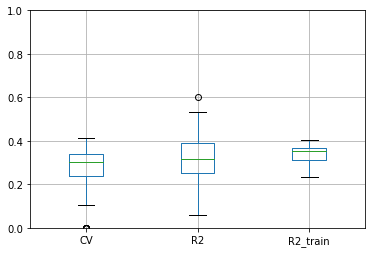

In [5]:
MaxGlobal=0
MaxGlobal_Score=0
MaxGlobal_Score_train=0

scores = {'CV': [], 'R2': [],'R2_train': []}

for j in range(5000,5051):
    from sklearn.model_selection import cross_val_score
    from sklearn.ensemble import GradientBoostingRegressor
    import numpy as np
    import pandas as pd
    import pickle
    from sklearn import metrics
    from sklearn import preprocessing
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import cross_val_predict
    import matplotlib.pyplot as plt
    #from neupy.algorithms import RBFKMeans
    #from neupy.algorithms import GRNN
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import r2_score
    from sklearn.svm import SVR
    from sklearn.neural_network import MLPRegressor
    from sklearn.neural_network import MLPClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.ensemble import AdaBoostRegressor
    from sklearn import linear_model
    import seaborn as sn
    import joblib
    import pandas as pd
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import GridSearchCV
    import warnings
    warnings.filterwarnings('ignore', category=FutureWarning)
    warnings.filterwarnings('ignore', category=DeprecationWarning)





    file_name = 'CA'
    dataset = pd.read_csv(file_name + '.csv', header=0)
    Test=dataset.loc[dataset['phi'] == 0.5]
    data= dataset[dataset.phi != 0.5]

    x1 = data.phi
    x2= data.ca
    X = np.column_stack((x1,x2))
    Y= np.asarray(data.uv).reshape(-1, 1)
    X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,random_state=j,stratify=X[:,0])


    xscaler = preprocessing.MinMaxScaler()
    X_train_standard=xscaler.fit_transform(X_train)
    X_test_standard=xscaler.transform(X_test)

    yscaler = preprocessing.MinMaxScaler()
    Y_train_standard =yscaler.fit_transform(Y_train)
    Y_test_standard =yscaler.transform(Y_test)

    Y_train_standard=Y_train_standard.ravel()
    Y_test_standard =Y_test_standard.ravel() 

    X1 = Test.phi
    X2= Test.ca
    XX = np.column_stack((X1,X2))
    YY= np.asarray(Test.uv).reshape(-1, 1)
    X_scaled=xscaler.transform(XX)
    Y_scaled=yscaler.transform(YY)
    Y_scaled=Y_scaled.ravel()




    def print_results_max(results):
        print('BEST PARAMS: {}\n'.format(results.best_params_))
        MAxMean=0
        means = results.cv_results_['mean_test_score']
        stds = results.cv_results_['std_test_score']
        for mean, std, params in zip(means, stds, results.cv_results_['params']):
            if mean > MAxMean :
                MAxMean = mean
                print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))
        return MAxMean



 # 'kernel' : ['linear', 'rbf','poly'],
    SVM =SVR()
    parameters = {
            'kernel' : ['poly'],
            'degree' : [3],
            'epsilon': [0.1,0],
             'C': list(np.arange(.01,0.02,0.01))
    }

    cv = GridSearchCV(SVM, parameters, cv=5)
    cv.fit(X_train_standard, Y_train_standard)



    MAxMean=print_results_max(cv)
    Score= cv.best_estimator_.score(X_test_standard, Y_test_standard).round(4)
    Score_train= cv.best_estimator_.score(X_train_standard, Y_train_standard).round(4)

    scores['CV'].append(MAxMean) 
    scores['R2'].append(Score)
    scores['R2_train'].append(Score_train)

    if MAxMean > MaxGlobal and Score>MaxGlobal_Score and Score_train>MaxGlobal_Score_train:
        MaxGlobal=MAxMean
        MaxGlobal_Score= Score
        MaxGlobal_Score_train = Score_train
        BestFit=cv.best_estimator_
        SVM_X_train_standard=X_train_standard
        SVM_Y_train_standard=Y_train_standard
        SVM_X_test_standard=X_test_standard
        SVM_Y_test_standard=Y_test_standard
        Number_Of_Estimators = j
        np.save('SVMpoly_X_train_standard',SVM_X_train_standard)
        np.save('SVMpoly_Y_train_standard',SVM_Y_train_standard)
        np.save('SVMpoly_X_test_standard',SVM_X_test_standard)
        np.save('SVMpoly_Y_test_standard',SVM_Y_test_standard)
        Xscaler=xscaler
        Yscaler=yscaler
        ypredTest=BestFit.predict(X_scaled)
        Testscore=r2_score(Y_scaled,ypredTest)
        joblib.dump(BestFit, 'SVM_modelpoly.pkl')
        
    
S=pd.DataFrame(scores) 
axis = S.boxplot()
axis.set_ylim([0,1]);
np.save('SVMpoly_CV',S.CV)
np.save('SVMpoly_R2',S.R2)
np.save('SVMpoly_R2_train',S.R2_train)
print("mean CV {0}".format(S.CV.mean()))
print("mean R2 {0}".format(S.R2.mean()))
print("mean R2_train {0}".format(S.R2_train.mean()))
print("Test Score {0}".format(Testscore))


In [6]:
Number_Of_Estimators #linear

5000

In [ ]:
Number_Of_Estimators #rbf

In [7]:
MaxGlobal

0.9429642791055526

In [8]:
MaxGlobal_Score

0.9891

In [9]:
BestFit

SVR(C=0.91, degree=1, epsilon=0)

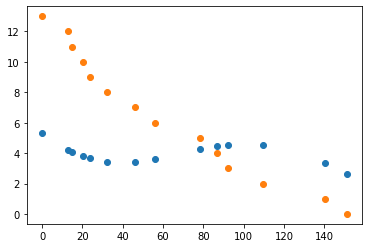

In [10]:
file_name = 'CA0.5'
data = pd.read_csv(file_name + '.csv', header=0)

x1 = data.phi
x2= data.ca
X = np.column_stack((x1,x2))
Y= np.asarray(data.uv).reshape(-1, 1)
X_scaled=Xscaler.transform(X)
Y_scaled=Yscaler.transform(Y)
Y_scaled=Y_scaled.ravel()
ypred=BestFit.predict(X_scaled)
from sklearn.metrics import r2_score
r2_score(Y_scaled,ypred)
actually_svmrbf=Yscaler.inverse_transform(ypred.reshape(-1,1))
np.save('actually_svmpoly',actually_svmrbf)
plt.scatter(x2,actually_svmrbf)
plt.scatter(x2,Y)


In [ ]:
#poly

In [ ]:
Number_Of_Estimators

In [ ]:
MaxGlobal

In [ ]:
MaxGlobal_Score

In [ ]:
BestFit